<a href="https://colab.research.google.com/github/Gfernandezv/Thesis/blob/main/Fluo_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("remotes")
install.packages("ggplot2")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [81]:
install.packages("ggstatsplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gmp’, ‘Rmpfr’, ‘PMCMRplus’, ‘statsExpressions’


Warning message in install.packages("ggstatsplot"):
“installation of package ‘gmp’ had non-zero exit status”
Warning message in install.packages("ggstatsplot"):
“installation of package ‘Rmpfr’ had non-zero exit status”
Warning message in install.packages("ggstatsplot"):
“installation of package ‘PMCMRplus’ had non-zero exit status”
Warning message in install.packages("ggstatsplot"):
“installation of package ‘statsExpressions’ had non-zero exit status”
Warning message in install.packages("ggstatsplot"):
“installation of package ‘ggstatsplot’ had non-zero exit status”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             

In [61]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
set.seed(123)
library(readr)
#library(ggstatsplot)
library(dplyr)
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [48]:
# Instala y carga el paquete readr si aún no lo has hecho
# install.packages("readr")

# Lee el archivo CSV desde GitHub y especifica el delimitador
Fluo.Data <- read_delim("https://raw.githubusercontent.com/Gfernandezv/Thesis/main/Data/Spine.Data.csv", delim = ";", escape_double = FALSE, locale = locale(decimal_mark = ",", grouping_mark = "."), trim_ws = TRUE, show_col_types = FALSE)



In [53]:
# puedes ver los datos utilizando
#Fluo.Data
datos <- Fluo.Data
datos_filtrados <- datos[datos$Area_Head_sqrmicro >= 0 & datos$Area_Head_sqrmicro <= 1.5 & datos$Ratio > 50,]
p <- ggbetweenstats(datos_filtrados, Short_ATF, Area_Head_sqrmicro, grouping.var = ATF, type = "np")

ERROR: Error in ggbetweenstats(datos_filtrados, Short_ATF, Area_Head_sqrmicro, : could not find function "ggbetweenstats"


In [64]:
NoED <- datos_filtrados %>%
  filter(Short_ATF == "NoED") %>%
  pull(Area_Head_sqrmicro)

VP64 <- datos_filtrados %>%
  filter(Short_ATF == "VP64") %>%
  pull(Area_Head_sqrmicro)

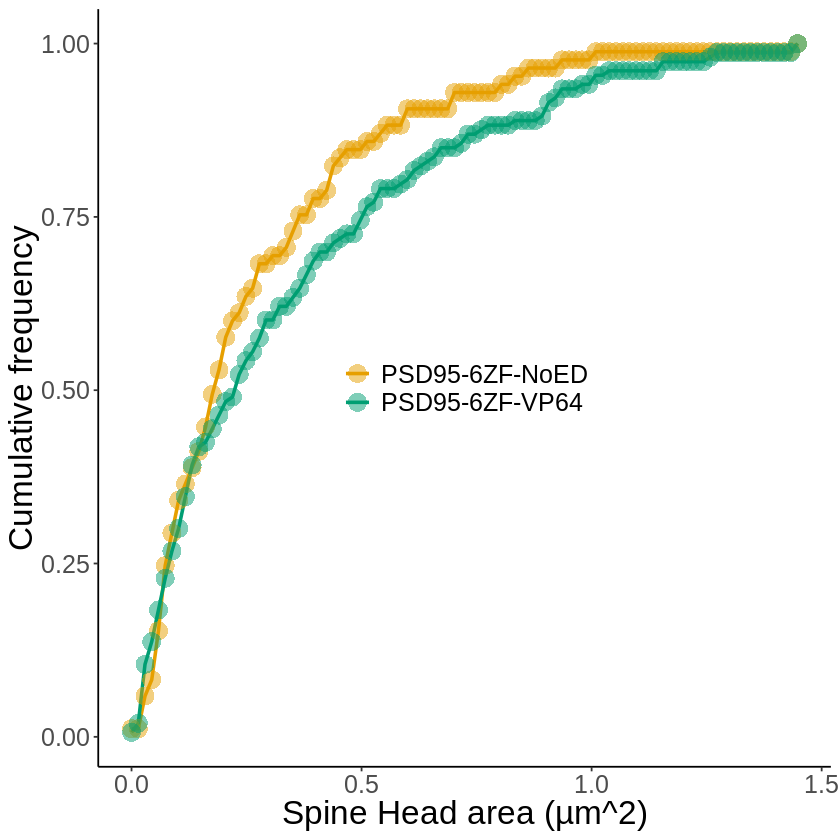

In [79]:
# Calcular frecuencias acumuladas
freq_acum_grupo1 <- ecdf(NoED)
freq_acum_grupo2 <- ecdf(VP64)

# Crear un dataframe para ggplot2
df_freq_acum <- data.frame(
  x = seq(min(datos_filtrados$Area_Head_sqrmicro), max(datos_filtrados$Area_Head_sqrmicro), length.out = 100),
  Grupo1 = freq_acum_grupo1(seq(min(NoED), max(NoED), length.out = 100)),
  Grupo2 = freq_acum_grupo2(seq(min(VP64), max(VP64), length.out = 100))
) %>%
  gather(key = "ATFs", value = "Cumulative_frequency", -x)

# Crear el gráfico
ggplot(df_freq_acum, aes(x = x, y = Cumulative_frequency, color = ATFs)) +
  geom_line(size = 1) +
  geom_point(shape = 16, alpha = 0.5, size = 5) +
  labs(title = "Gráfico de Frecuencia Acumulada",
       x = "Spine Head area (µm^2)",
       y = "Cumulative frequency") +
  scale_color_manual(name='ATFs',
                     breaks=c("Grupo1", "Grupo2"),
                     labels=c("PSD95-6ZF-NoED", "PSD95-6ZF-VP64"),
                     values=c("Grupo1"="#E69F00", "Grupo2"="#009E73")) +
  theme_classic() +
  theme(legend.position = "inside",
        legend.text = element_text(size = 15, color = "black"),
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        title = element_blank())
